# <font color='blue' size=8pt> Supervised Learning - Decision Trees,  Random Forest and eXtreme Gradient Boosting (XGBoost) </font>

## What is a Decision Tree?

* **Main Idea**:  organize the feature space in as a collection of units (in Euclidean space, rectangular boxes) such that all observations in each unit have some homogeneity (similar range of one or more features). As such, every observation goes into some unit and the predicted value is assigned by computing the mean (regression) or the votes (classification) over the entire unit.

* **General View**:  the input features can be a mix of discrete and continuous variables and the dependent variable  can be either continuous (for regression problems) or discrete (for classification problems).

* **Important**: This is an iterative process. The decisions are nodes in the tree, from each node we split two branches. The decisions are informed by objective functions (e.g. we can think of mean squared error for regression or the Gini impurity for classification). The final decisions are represented as piecewise defined, step functions.


**Example**: predict the mileage of the car by using its weight in 1000 lbs. (MTCars data set).

<figure>
<center>
<img src='https://i.imgur.com/hUsgO38.png'
width='700px' height='400px' />
<figcaption>MPG prediction based on the weight of the car.</figcaption></center>
</figure>


The following is a visualization in the feature-vs-target space:



<figure>
<center>
<img src='https://i.imgur.com/533esyN.png'
width='570px' height='400px' />
<figcaption>MPG prediction based on the weight of the car.</figcaption></center>
</figure>


**Example**: predict the mileage of the car by using weight and HP. (MTCars data set).



<figure>
<center>
<img src='https://i.imgur.com/xyLBMO6.png'
width='700px' height='400px' />
<figcaption>MPG prediction based on the weight of the car.</figcaption></center>
</figure>


In a two-dimensional feature space, below we have a visualization example of the compartmentalization by decision trees:



<figure>
<center>
<img src='https://i.imgur.com/5e3tJ7C.png'
width='570px' height='400px' />
<figcaption>Visualization of the step function created with decision trees.</figcaption></center>
</figure>




### Decision Trees for Regression

**Measuring Loss**: for the objective function we can use either the mean absolute error or the mean square error.

**Algorithm**:

<figure>
<center>
<img src='https://i.imgur.com/GtrCOkQ.png'
width='950px' height='400px' />
</figure>


### Decision Trees for Classification

**Example**:  A biologist recorded the weights of rabbits and squirrels in a data set.
A decision tree starts with the root node such as if the weight is less than a threshold value, then inside the resulting subset (branch) there are more squirrels than rabbits.

**Measuring Loss**: The Gini impurity index measures the likelihood of missclassification in each node:

$$\large G:= \sum_{i=1}^{C} p(i)\cdot(1-p(i))= 1 - \sum_{i=1}^{C} p^2(i)$$

where $C$ is the number of distinct classes and $p(i)$ represents the probability of choosing and element of class $i$ if one individual is randomly selected in the node.


<figure>
<center>
<img src='https://i.imgur.com/bbexpWB.png'
width='700px' height='400px' />
<figcaption>Example of a Decision Tree for Classification.</figcaption></center>
</figure>



For a binary classification problem, we can think of approximating two distinct probability distributions:

<figure>
<center>
<img src='https://i.imgur.com/QjxC1CM.png'
width='520px' height='500px' />
<figcaption>Separating different distributions.</figcaption></center>
</figure>




## Random Forests

**Original Abstract** (L. Breiman, 2001): Random forests are a combination of tree predictors such that each tree depends on the values of a random vector sampled independently and with the same distribution for all trees in the forest. The generalization error for forests converges almost surely to a limit as the number of trees in the forest becomes large. The generalization error of a forest of tree classifiers depends on the strength of the individual trees in the forest and the correlation between them. Using a random selection of features to split each node yields error rates that compare favorably to Adaboost (Freund and Schapire[1996]), but are more robust with respect to noise. Internal estimates monitor error, strength, and correlation and these are used to show the response to increasing the number of features used in the splitting. Internal estimates are also used to measure variable importance. These ideas are also applicable to regression.

**Main Idea**: grow many decision trees based on random samples of set of observations and then average the predictions across the trees in the forest for the final answer. One important aspect is that the random sampling is done with replacement (“bootstrap aggregation”).




### Decision Boundaries Comparison

An example of decision boundaries for Decsion Trees vs Random Forest.

<div style="display: flex; justify-content: space-around;">
    <img src="https://i.imgur.com/oXXSa8g.png" alt="Image 1" style="width: 45%;">
    <img src="https://i.imgur.com/PiAw1Xl.png" alt="Image 2" style="width: 45%;">
</div>


## Boosting

Boosting (Schapire and Freund 2012) is a greedy algorithm for fitting adaptive basis-function where the weights are generated by an algorithm called a weak
learner or a base learner. The algorithm works by applying the weak learner sequentially to weighted versions of the data, where more weight is given to examples that were misclassified by earlier rounds.
This weak learner can be any classification or regression algorithm. In 1998, the late Leo Breiman called boosting, where the weak learner is a shallow
decision tree, the “best off-the-shelf classifier in the world” (Hastie et al. 2009, p340). (Reference: K. Murphy - "Machine Learning - A Probilistic Perspective", page 554.)


### How Does Adaptive Boosting Work?

We can understand the working of the AdaBoost algorithm in step by step manner as going deep into the work, we can see there are multiple basic steps which this algorithm follows. Let’s take a look at these steps.

**1.** When the algorithm is given data, it starts by assigning equal weights to all training examples in the dataset. These weights represent the importance of each sample during the training process.

**2.** Here, this algorithm iterates with a few algorithms for a specified number of iterations (or until a stopping criterion is met). The algorithm trains a weak classifier on the training data. Here the weak classifier can be considered a model that performs slightly better than random guessing, such as a decision stump (a one-level decision tree).

**3.** During each iteration, the algorithm trains the weak classifier on given training data with the current sample weights. The weak classifier aims to minimize the classification error, weighted by the sample weights.

**4.** After training the weak classifier, the algorithm calculates classifier weight based on the errors of the weak classifier. A weak classifier with a lower error receives a higher weight.

**5.** Once the calculation of weight completes, the algorithm updates sample weights, and the algorithm gives assigns higher weights to misclassified examples so that more importance in subsequent iterations can be given.

**6.** After updating the sample weights, they are normalized so that they sum up to 1 and Combine the predictions of all weak classifiers using a weighted majority vote. The weights of the weak classifiers are considered when making the final prediction.

**7.** Finally, Steps 2–5 are repeated for the specified number of iterations (or until the stopping criterion is met), with the sample weights updated at each iteration. The final prediction is obtained by aggregating the predictions of all weak classifiers based on their weights.

The below pseudocode can be helpful in understanding the working of the AdaBoost algorithm.

```pseudo
Initialize sample weights for each training example
For each iteration:
- Train a weak classifier using the current sample weights
- Calculate the error of the weak classifier
- Calculate the weight of the weak classifier based on the error
- Update the sample weights based on the weak classifier's performance
- Normalize the sample weights
End the iterations
Combine the weak classifiers using a weighted majority vote.
```

Reference: https://medium.com/@datasciencewizards/understanding-the-adaboost-algorithm-2e9344d83d9b


## Gradient Boosting

Assume you have an regressor $F$ and, for the observation $x_i$ we make the prediction $F(x_i)$. To improve the predictions, we can regard $F$ as a 'weak learner' and therefore train a decision tree (we can call it $h$) where the new output is $y_i-F(x_i)$. So, the new predictor is trained on the residuals of the previous one. Thus, there are increased chances that the new regressor

$$\large F + h$$

is better than the old one, $F.$

Main task: implement this idea in an algorithm and test it on real data sets.


<figure>
<center>
<img src='https://i.imgur.com/ql0JiCd.png'width='400px'/>
<figcaption>Gradient Boosting w/Two Steps for Regression</figcaption></center>
</figure>


## eXtreme Gradient Boosting (XGBoost)

XGBoost is a powerful and widely used machine learning algorithm. It's a specific implementation of gradient boosting, a technique that builds an ensemble of predictive models (typically decision trees) in a sequential manner. Each new model focuses on correcting the errors of the previous ones, leading to a final model that is often significantly more accurate than any of its individual components.

How Does XGBoost Work?

* **Initialization**: XGBoost begins by creating a simple initial model, usually a single decision tree, that makes predictions based on the input features. This initial model will likely have errors.

* **Gradient Calculation**: XGBoost then calculates the gradients of the loss function (a measure of how well the model is performing) with respect to the predictions of the current model. These gradients indicate the direction and magnitude of changes needed to improve the predictions.

* **New Tree Creation**: A new decision tree is trained to predict these gradients. This tree essentially learns how to correct the errors of the previous model.

* **Tree Weighting**: The new tree is added to the ensemble with a weight that determines how much influence it has on the final predictions. This weight is typically a small value to avoid overfitting.

* **Iteration**: Steps 2-4 are repeated for a specified number of iterations or until the model's performance stops improving. With each iteration, new trees are added to the ensemble, each focusing on correcting the residual errors of the previous trees.

* **Final Prediction**:  The final prediction is made by summing the weighted predictions of all the trees in the ensemble.

Key Features and Advantages of XGBoost:

* **Regularization**: XGBoost includes regularization techniques (L1 and L2 regularization) to prevent overfitting, making it more robust to noise and outliers in the data.

* **Handling Missing Values**: XGBoost can automatically handle missing values in the input data without requiring explicit imputation.

* **Parallelization**: The algorithm can be parallelized across multiple cores or machines, making it scalable to large datasets.

* **Tree Pruning**: XGBoost prunes trees during training to remove branches that don't contribute significantly to the model's accuracy, further preventing overfitting.

* **Feature Importance**: It provides a measure of feature importance, allowing you to understand which features are most influential in making predictions.
Where is XGBoost Used?

XGBoost is extremely versatile and is used in a wide range of applications, including:

* **Classification**: Predicting categorical outcomes (e.g., customer churn, fraud detection, disease diagnosis)
Regression: Predicting continuous outcomes (e.g., house prices, stock prices, sales forecasting)
Ranking: Ranking items in order of relevance (e.g., search engine results, product recommendations)
Important Considerations:

XGBoost can be sensitive to hyperparameter tuning, so careful optimization is often required.
It may be computationally expensive for very large datasets.

# Code Applications
---



## Setup

In [2]:
import os
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  from google.colab import drive
  drive.mount('/content/drive')
  os.chdir('/content/drive/My Drive/Data Sets')
  !pip install -q pygam
  !pip install -q dtreeviz
else:
  print('Running locally')
  os.chdir('../Data')

Running on CoLab
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.6 MB/s eta 0:00:00


In [3]:
# import libraries
import numpy as np
import pandas as pd
import pydot
from IPython.display import Image

from xgboost import XGBClassifier

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import tree
import dtreeviz

## Data import

In [6]:
data_example_1 = pd.read_csv('example_data_classification.csv', header=None)
data_fusion_experiment = pd.read_csv('fusion_experiment.csv')

## Example 1

In [ ]:
data_example_1.columns = ['Exam 1','Exam 2','Status']

In [ ]:
data_example_1

,Exam 1,Exam 2,Status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [ ]:
x = data_example_1[['Exam 1','Exam 2']]
y = data_example_1['Status']

In [ ]:
model = tree.DecisionTreeClassifier(max_depth=4,min_samples_leaf=5,random_state=123)
model.fit(x,y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=123)

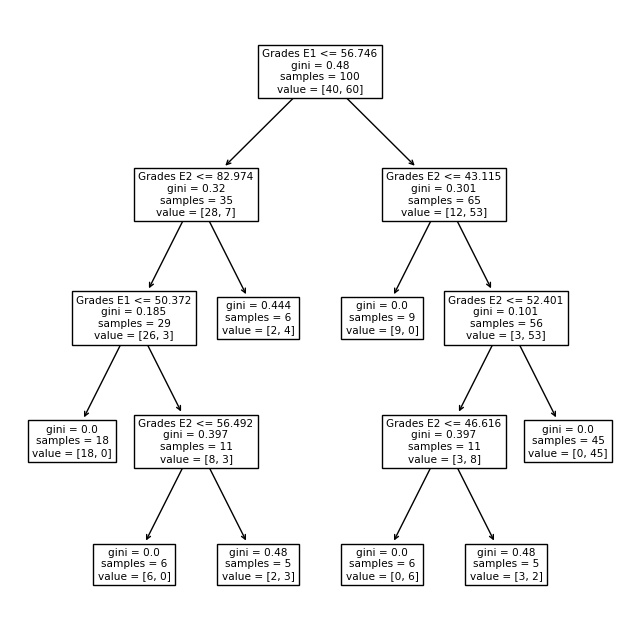

In [ ]:
plt.figure(figsize=(8,8))
tree.plot_tree(model,feature_names = ['Grades E1','Grades E2'])
plt.savefig('DecisionTree_Example.svg', bbox_inches='tight')
plt.show()

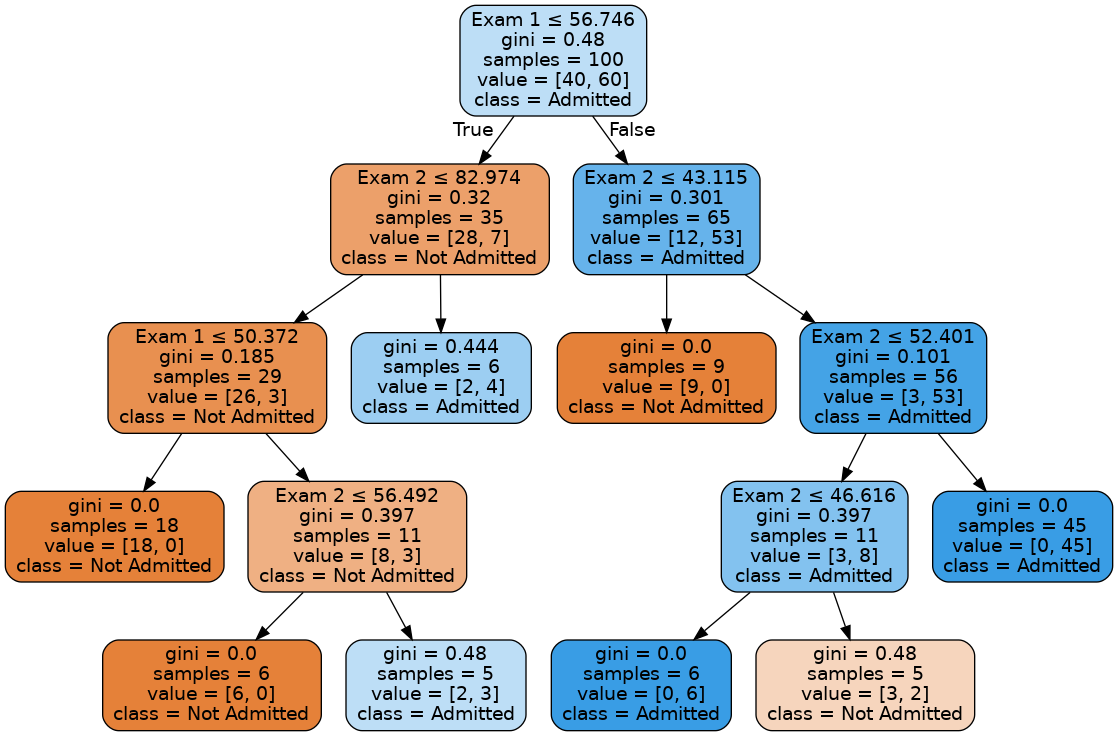

In [ ]:
def ShowTree(classifier, features, classes):
    dot_data = tree.export_graphviz(model, out_file=None, filled=True, rounded=True,
                special_characters=True, feature_names=x.columns, class_names=classes)
    (g,) = pydot.graph_from_dot_data(dot_data)
    #g.set_dpi('100')
    g.write_png('tree.png')
    return Image(g.create_png())

ShowTree(model, x.columns,['Not Admitted','Admitted'])

In [ ]:
h = .1 # step size in the grid of points
cmap_light = ListedColormap(['#FFD0D7', 'lightcyan'])
cmap_bold = ListedColormap(['red', 'navy'])

In [ ]:
# create a grid of values for the features' space
x_min, x_max = x.values[:, 0].min() - 1, x.values[:, 0].max() + 1
y_min, y_max = x.values[:, 1].min() - 1, x.values[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

### Example of Decision Boundary from a Binary Tree

Accuracy : 0.94


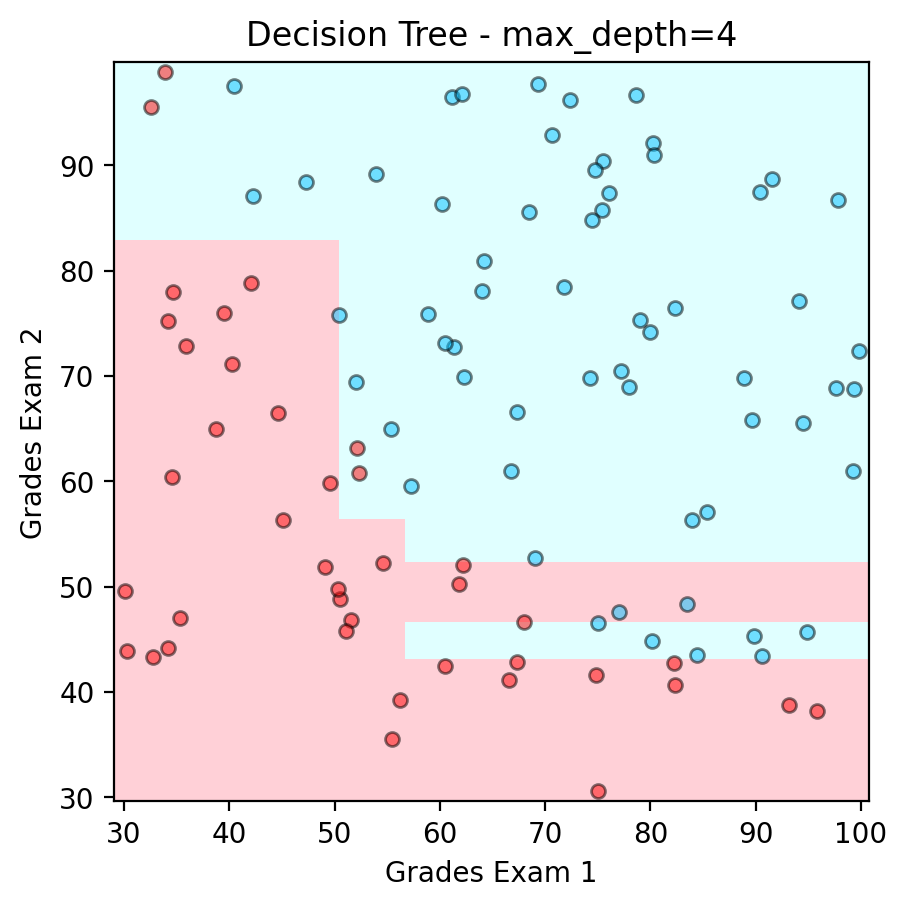

In [ ]:
# filter out the applicants that got admitted
admitted = data_example_1.loc[y == 1]

# filter out the applicants that din't get admission
not_admitted = data_example_1.loc[y == 0]


# show the decision boundary in the features' space
Z = model.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()],columns=['Exam 1','Exam 2']))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


# Plot also the points
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], color ='deepskyblue', s=25, label='Admitted',ec='k',alpha=0.5)
plt.scatter(not_admitted.iloc[:, 0] ,not_admitted.iloc[:, 1], color ='red', s=25,ec='k',alpha=0.5, label='Not Admitted')
plt.xlim(xx.min(), xx.max())
plt.xlabel('Grades Exam 1')
plt.ylabel('Grades Exam 2')
plt.ylim(yy.min(), yy.max())
ax.set_aspect('equal', 'box')
plt.title("Decision Tree - max_depth=4")
print('Accuracy : ' + str(accuracy_score(y,model.predict(x))))
plt.savefig('dtree.png',dpi=300)
plt.show()

### Example of Decision Boundary from XGBoost

In [ ]:
model = XGBClassifier(n_estimators=10, max_depth = 4,random_state=123)
model.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

Accuracy : 1.0


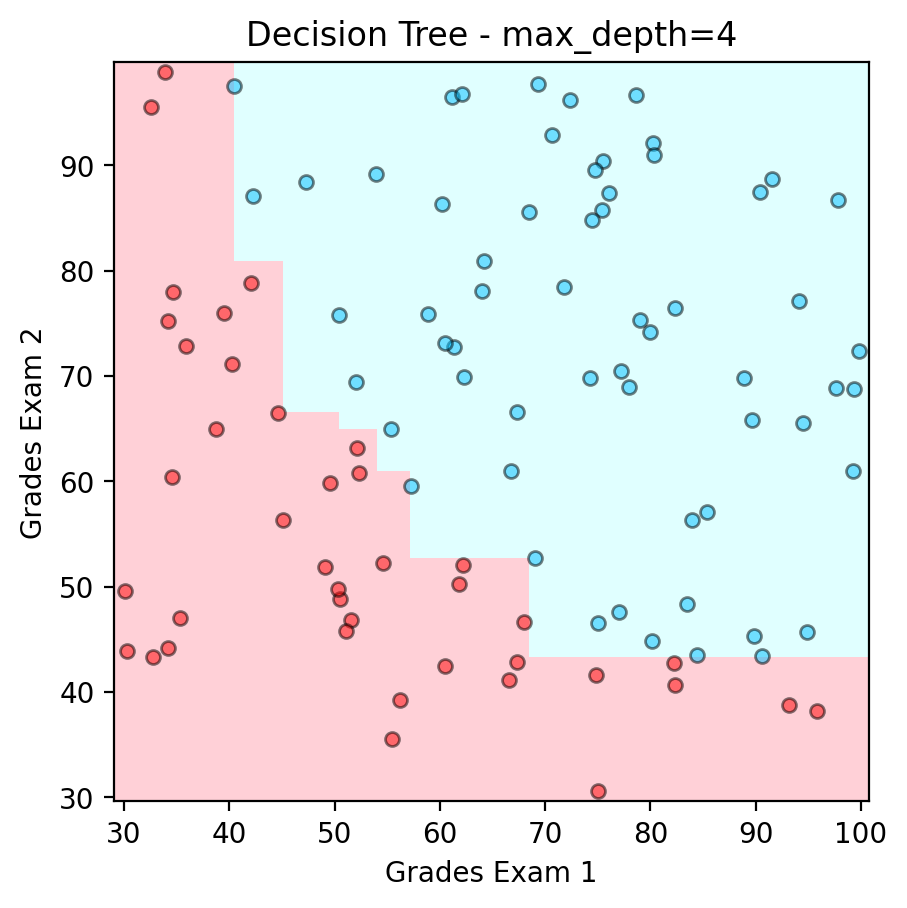

In [ ]:
# show the decision boundary in the features' space
Z = model.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()],columns=['Exam 1','Exam 2']))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


# Plot also the points
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], color ='deepskyblue', s=25, label='Admitted',ec='k',alpha=0.5)
plt.scatter(not_admitted.iloc[:, 0] ,not_admitted.iloc[:, 1], color ='red', s=25,ec='k',alpha=0.5, label='Not Admitted')
plt.xlim(xx.min(), xx.max())
plt.xlabel('Grades Exam 1')
plt.ylabel('Grades Exam 2')
plt.ylim(yy.min(), yy.max())
ax.set_aspect('equal', 'box')
plt.title("Decision Tree - max_depth=4")
print('Accuracy : ' + str(accuracy_score(y,model.predict(x))))
plt.savefig('dtree.png',dpi=300)
plt.show()

## Example 2 - Fusion Experiment Data

In [ ]:
data_fusion_experiment.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
data_fusion_experiment


,Magnetic Field Fluctuations,Leakage,Instabilities,Plasma Instabilities,Magnetic Field Strength,Magnetic Field Configuration,Injection Energy,Beam Symmetry,Target Density,Target Composition,Fuel Density,Temperature,Confinement Time,Fuel Purity,Energy Input,Power Output,Pressure,Neutron Yield,Ignition
0,0.037454,0.058078,0.028259,0.015705,9.000578,tokamak,5.713125,0.800007,2.026963e+19,deuterium,7.612226e+19,4.050388e+08,0.842126,99.971295,250.726719,55.321517,6.107792e+06,5.443404e+10,0
1,0.095071,0.052697,0.045868,0.009551,3.841421,reversed field pinch,9.819548,0.082642,3.050685e+19,deuterium-tritium,8.742441e+19,2.551963e+08,0.504637,99.951049,345.614166,22.767959,4.921946e+06,8.372016e+10,0
2,0.073199,0.035104,0.009922,0.013794,1.467187,stellarator,7.016781,0.176319,5.287388e+19,tritium,8.236610e+19,2.627651e+08,0.357445,99.958831,290.050980,49.872944,9.798230e+06,8.112584e+10,1
3,0.059866,0.049321,0.044684,0.047349,9.277696,tokamak,4.018930,0.833709,5.961305e+19,deuterium-tritium,9.079654e+19,3.104709e+08,0.992195,99.997186,436.491093,2.656182,5.611293e+06,4.423307e+10,1
4,0.015602,0.036510,0.020308,0.088453,4.926347,reversed field pinch,6.145836,0.808161,7.887942e+19,deuterium,8.186142e+19,3.258529e+08,0.648677,99.927054,198.773196,48.096005,8.541064e+06,2.245276e+10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.079230,0.062215,0.009281,0.075015,6.989681,tokamak,8.363230,0.080241,6.220430e+19,deuterium-tritium,8.029543e+19,3.534515e+08,0.434566,99.917577,130.728901,51.822726,9.611845e+06,6.252602e+10,0
99996,0.077925,0.062922,0.062563,0.027253,9.904975,reversed field pinch,3.718771,0.977716,3.429971e+19,tritium,1.608651e+19,4.554238e+08,0.888713,99.902695,114.869008,9.746068,1.099463e+06,4.545773e+10,0
99997,0.067445,0.019220,0.062666,0.057559,5.389669,tokamak,8.788397,0.374680,4.750184e+19,tritium,3.021016e+19,2.331046e+08,0.323766,99.910285,458.044080,69.116870,7.473165e+06,7.240109e+10,0
99998,0.049945,0.065308,0.004765,0.089334,6.984881,tokamak,3.024949,0.926179,3.030606e+19,deuterium-tritium,4.217068e+19,2.660837e+08,0.646530,99.984932,342.844863,31.591851,6.759779e+06,7.576517e+10,0


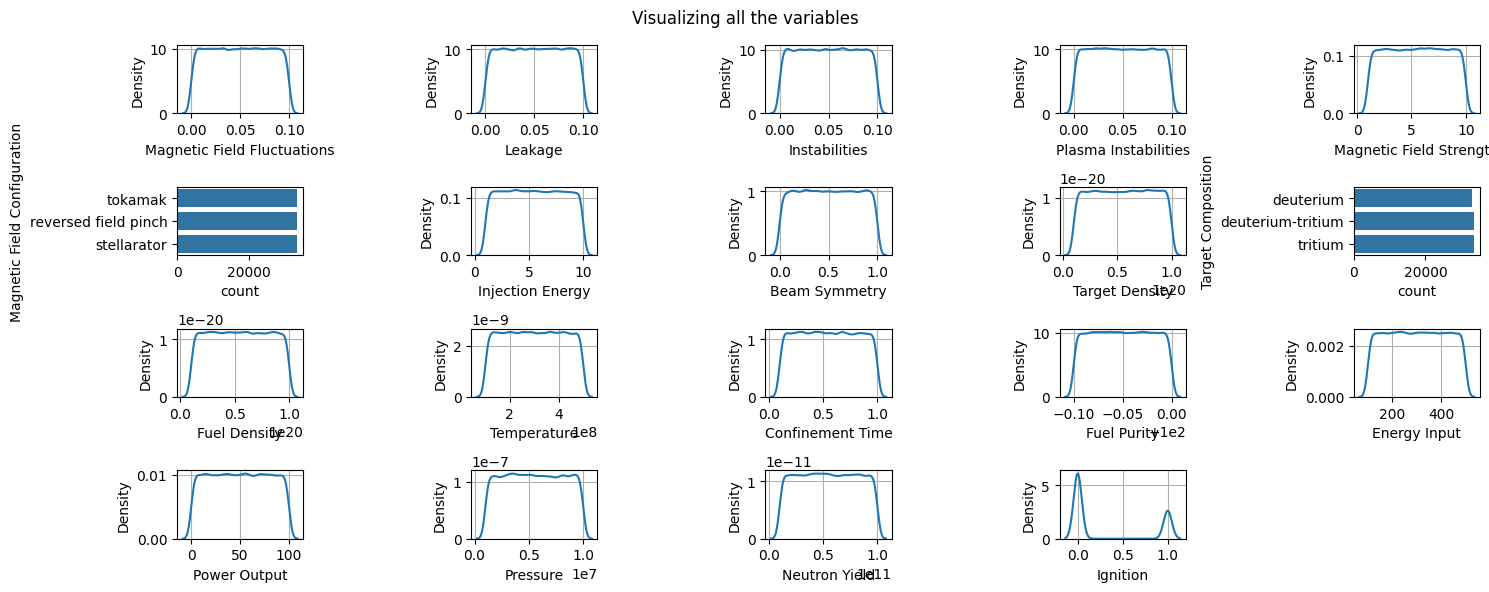

In [ ]:
r=4
c=5
it=1
plt.figure(figsize=(15,6))
for i,j in enumerate(data_fusion_experiment.columns):
    plt.suptitle("Visualizing all the variables")
    plt.subplot(r,c,it)
    if data_fusion_experiment[j].dtype=='object':
        sns.countplot(y=data_fusion_experiment[j])
    else:
        sns.kdeplot(data_fusion_experiment[j])
        plt.grid()
    it+=1
plt.tight_layout()
plt.show()

In [ ]:
y=data_fusion_experiment['Ignition']
x=data_fusion_experiment.drop('Ignition',axis=1)

In [ ]:
scale = MinMaxScaler()
x[['Target Density','Fuel Density', 'Temperature','Fuel Purity', 'Energy Input', 'Power Output',
       'Pressure', 'Neutron Yield','Injection Energy','Magnetic Field Strength']] = scale.fit_transform(x[['Target Density','Fuel Density', 'Temperature','Fuel Purity', 'Energy Input', 'Power Output',
       'Pressure', 'Neutron Yield','Injection Energy','Magnetic Field Strength']])

In [ ]:
x

,Magnetic Field Fluctuations,Leakage,Instabilities,Plasma Instabilities,Magnetic Field Strength,Magnetic Field Configuration,Injection Energy,Beam Symmetry,Target Density,Target Composition,Fuel Density,Temperature,Confinement Time,Fuel Purity,Energy Input,Power Output,Pressure,Neutron Yield
0,0.037454,0.058078,0.028259,0.015705,0.888952,tokamak,0.523681,0.800007,0.114107,deuterium,0.734697,0.762599,0.842126,0.712955,0.376815,0.553218,0.567532,0.493704
1,0.095071,0.052697,0.045868,0.009551,0.315699,reversed field pinch,0.979955,0.082642,0.227855,deuterium-tritium,0.860278,0.387991,0.504637,0.510491,0.614049,0.227680,0.435771,0.819116
2,0.073199,0.035104,0.009922,0.013794,0.051889,stellarator,0.668533,0.176319,0.476379,tritium,0.804074,0.406913,0.357445,0.588316,0.475132,0.498732,0.977582,0.790289
3,0.059866,0.049321,0.044684,0.047349,0.919744,tokamak,0.335435,0.833709,0.551260,deuterium-tritium,0.897747,0.526178,0.992195,0.971876,0.841257,0.026562,0.512366,0.380356
4,0.015602,0.036510,0.020308,0.088453,0.436249,reversed field pinch,0.571760,0.808161,0.765332,deuterium,0.798467,0.564633,0.648677,0.270543,0.246922,0.480962,0.837896,0.138345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.079230,0.062215,0.009281,0.075015,0.665514,tokamak,0.818140,0.080241,0.580052,deuterium-tritium,0.781067,0.633630,0.434566,0.175771,0.076800,0.518230,0.956872,0.583618
99996,0.077925,0.062922,0.062563,0.027253,0.989443,reversed field pinch,0.302084,0.977716,0.269998,tritium,0.067626,0.888561,0.888713,0.026950,0.037147,0.097461,0.011050,0.393964
99997,0.067445,0.019220,0.062666,0.057559,0.487731,tokamak,0.865381,0.374680,0.416690,tritium,0.224557,0.332762,0.323766,0.102846,0.895143,0.691172,0.719241,0.693344
99998,0.049945,0.065308,0.004765,0.089334,0.664981,tokamak,0.224991,0.926179,0.225624,deuterium-tritium,0.357454,0.415210,0.646530,0.849331,0.607126,0.315920,0.639975,0.730724


In [ ]:
x['Target Composition'] = x['Target Composition'].astype('category')
x['Magnetic Field Configuration'] = x['Magnetic Field Configuration'].astype('category')

In [ ]:
y.unique()

array([0, 1])

In [ ]:
model = XGBClassifier(n_estimators=50,alpha = 0.2,enable_categorical=True)

In [ ]:
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=123)
out = cross_val_score(model,x,y,cv=skf,scoring='roc_auc')
np.mean(out)

0.5036572607284255